Признаки данных:
* churn - ушедший (Attrited) или текущий (Existing) клиент
* Customer_Age - Демографическая переменная-возраст клиента в годах
* Gender - Демографические переменные - M=мужской, F=женский
* Dependent_count - Демографическая переменная-число иждивенцев
* Education_Level - Демографическая переменная - образовательная квалификация владельца счета (пример: средняя школа, выпускник колледжа и т. д.)
* Marital_Status - Демографическая переменная-женат, холост, разведен, неизвестен
* Income_Category - Демографическая переменная - категория годового дохода владельца счета (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, неизвестно)
* Card_Category - Переменная продукта-Тип карты (Синяя, серебряная, золотая, Платиновая)
* Months_on_book - Период взаимоотношений с банком
* Total_Relationship_Count - Общее количество продуктов, находящихся у клиента
* Months_Inactive_12_mon - Количество месяцев бездействия за последние 12 месяцев
* Contacts_Count_12_mon - Количество контактов за последние 12 месяцев
* Credit_Limit - Кредитный лимит по кредитной карте
* Total_Revolving_Bal - Общий оборотный остаток на кредитной карте
* Avg_Open_To_Buy - Открытая для покупки кредитная линия (в среднем за последние 12 месяцев)
* Total_Amt_Chng_Q4_Q1 - Изменение суммы сделки (4 квартал по сравнению с 1 кварталом)
* Total_Trans_Amt - Общая сумма сделки (за последние 12 месяцев)
* Total_Trans_Ct - Общее количество транзакций (за последние 12 месяцев)
* Total_Ct_Chng_Q4_Q1 - Изменение количества транзакций (Q4 по сравнению с Q1)
* Avg_Utilization_Ratio - Средний Коэффициент Использования Карт

In [1]:
import pandas as pd #Импортируем различные библиотеки для исследований данных и визуализации
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\nicka\Downloads\Telegram Desktop\churn.csv") #Читаем файл csv с которым будем работать
df.head() #Проверяем корректность загрузки

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Выводим конец наших данных для проверки загрузки

In [2]:
df.tail()

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [3]:
df.duplicated().sum() #Проверяем на наличие дубликатов

0

Проверяем наличие пропусков

churn                       0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


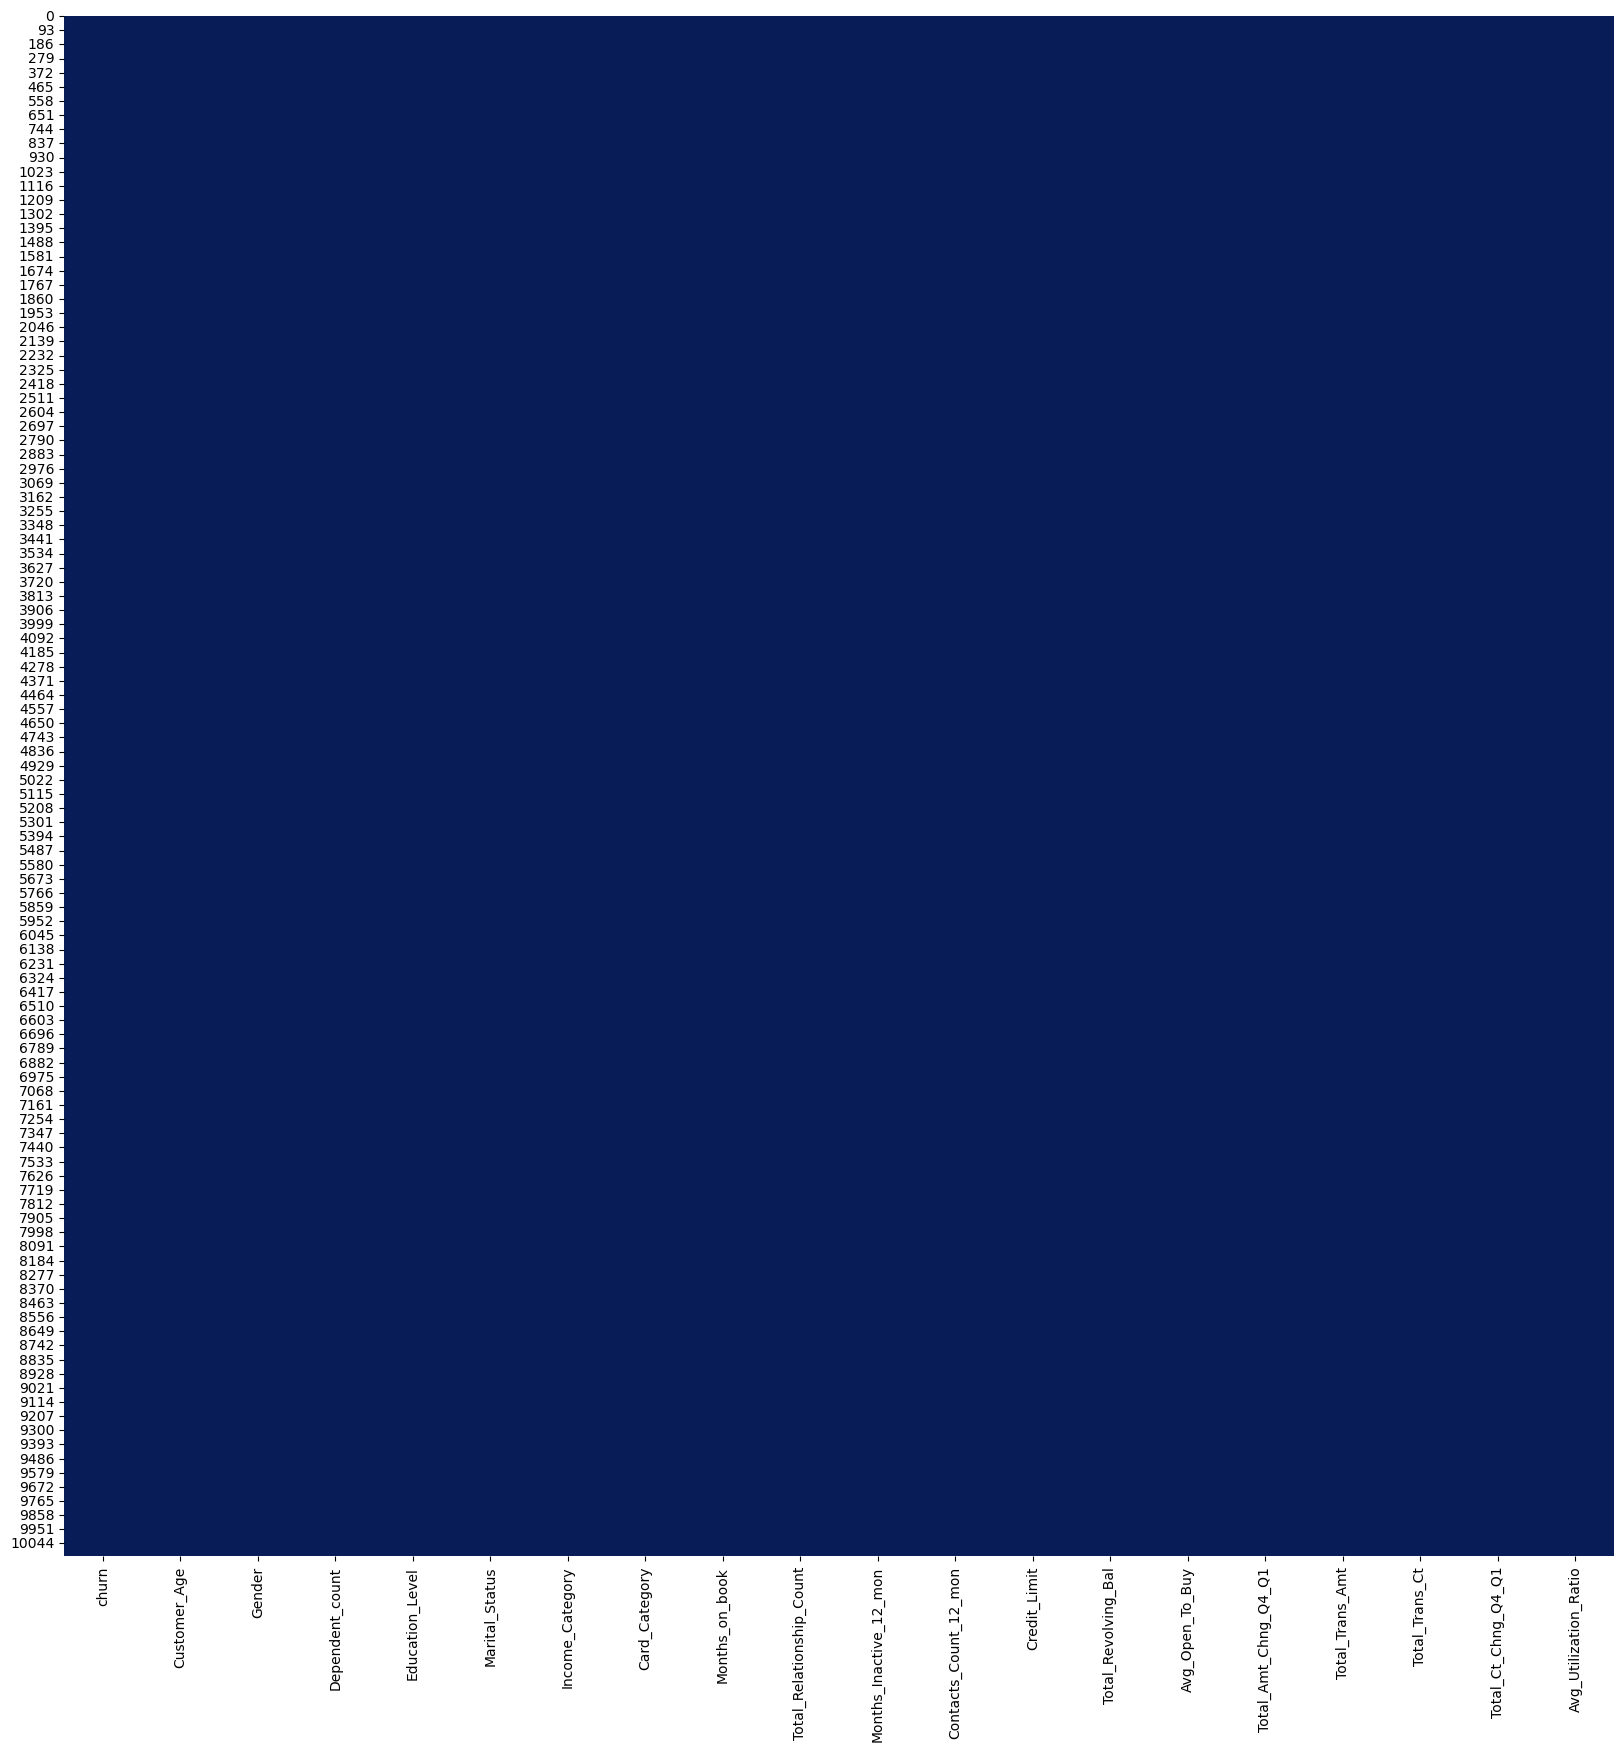

In [4]:
# Импортируем библиотеки визуализации
import seaborn as sns
import matplotlib.pyplot as plt
#------------------------------------
plt.figure(figsize = (20,20))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)
print(df.isnull().sum())

In [9]:
df

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [5]:
df.info() #Проверяем на наличие пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Как видим пропущенных значений нету

Выводим уникальные значения для каждого строкового столбца для проверки наличия выбросов и ошибок

In [6]:
print(df['churn'].unique(), df['Gender'].unique(), df['Education_Level'].unique(), df['Marital_Status'].unique(),
      df['Income_Category'].unique(), df['Card_Category'].unique(), sep=('\n'))      #Чтобы не мешал

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


Как можем увидеть единственный выброс для колонкок является unknown  в Education_Level, Marital_Status и Income_Category

Для начала чтобы обработать эти пропуски удалим Unknown из колонки Income_Category, ведь эта колонка является целевой, а её заполнение по каким-либо параметрам может быть некорректно, что может запутать модель при последующем обучении

In [7]:
df.drop(df[df['Income_Category'] == 'Unknown'].index,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
9011,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
9012,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
9013,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Далее исследуем остальные колонки с unknown

In [8]:
df.drop(df[df['Education_Level'] == 'Unknown'].index,inplace=True)

In [9]:
df.drop(df[df['Marital_Status'] == 'Unknown'].index,inplace=True)

Как видим с удалением 'пустых значений' из колонки income_category они удалились, ещё раз проверим эти колонки на unknown

In [10]:
print(df['Education_Level'].unique(), df['Marital_Status'].unique(),
      df['Income_Category'].unique(), sep=('\n'))

['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']


Распределение числовых данных:

In [11]:
df.describe().T #Смотрим числа на выбросы, видим что некоторые сильновато отличаются от среднего, по этому, чтобы найти такие
              #записи и стереть их будем строить графики

,count,mean,std,min,25%,50%,75%,max
Customer_Age,7081.0,46.347691,8.041225,26.0,41.000,46.000,52.000,73.000
Dependent_count,7081.0,2.337805,1.291649,0.0,1.000,2.000,3.000,5.000
Months_on_book,7081.0,35.981359,8.002609,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,7081.0,3.819376,1.544444,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,7081.0,2.342607,0.995104,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,7081.0,2.454456,1.104917,0.0,2.000,2.000,3.000,6.000
Credit_Limit,7081.0,8492.773831,9126.072520,1438.3,2498.000,4287.000,10729.000,34516.000
Total_Revolving_Bal,7081.0,1167.501624,812.315606,0.0,463.000,1282.000,1781.000,2517.000
Avg_Open_To_Buy,7081.0,7325.272207,9131.217585,3.0,1248.000,3250.000,9491.000,34516.000
Total_Amt_Chng_Q4_Q1,7081.0,0.760584,0.223139,0.0,0.629,0.735,0.858,3.397


In [2]:
df_copy = df.copy(deep=True) #Копируем данные чтобы не испортить изначальный набор

### Поиск и удаление выбросов

Посмотрим распределение данных на графике на выбросы

<Axes: >

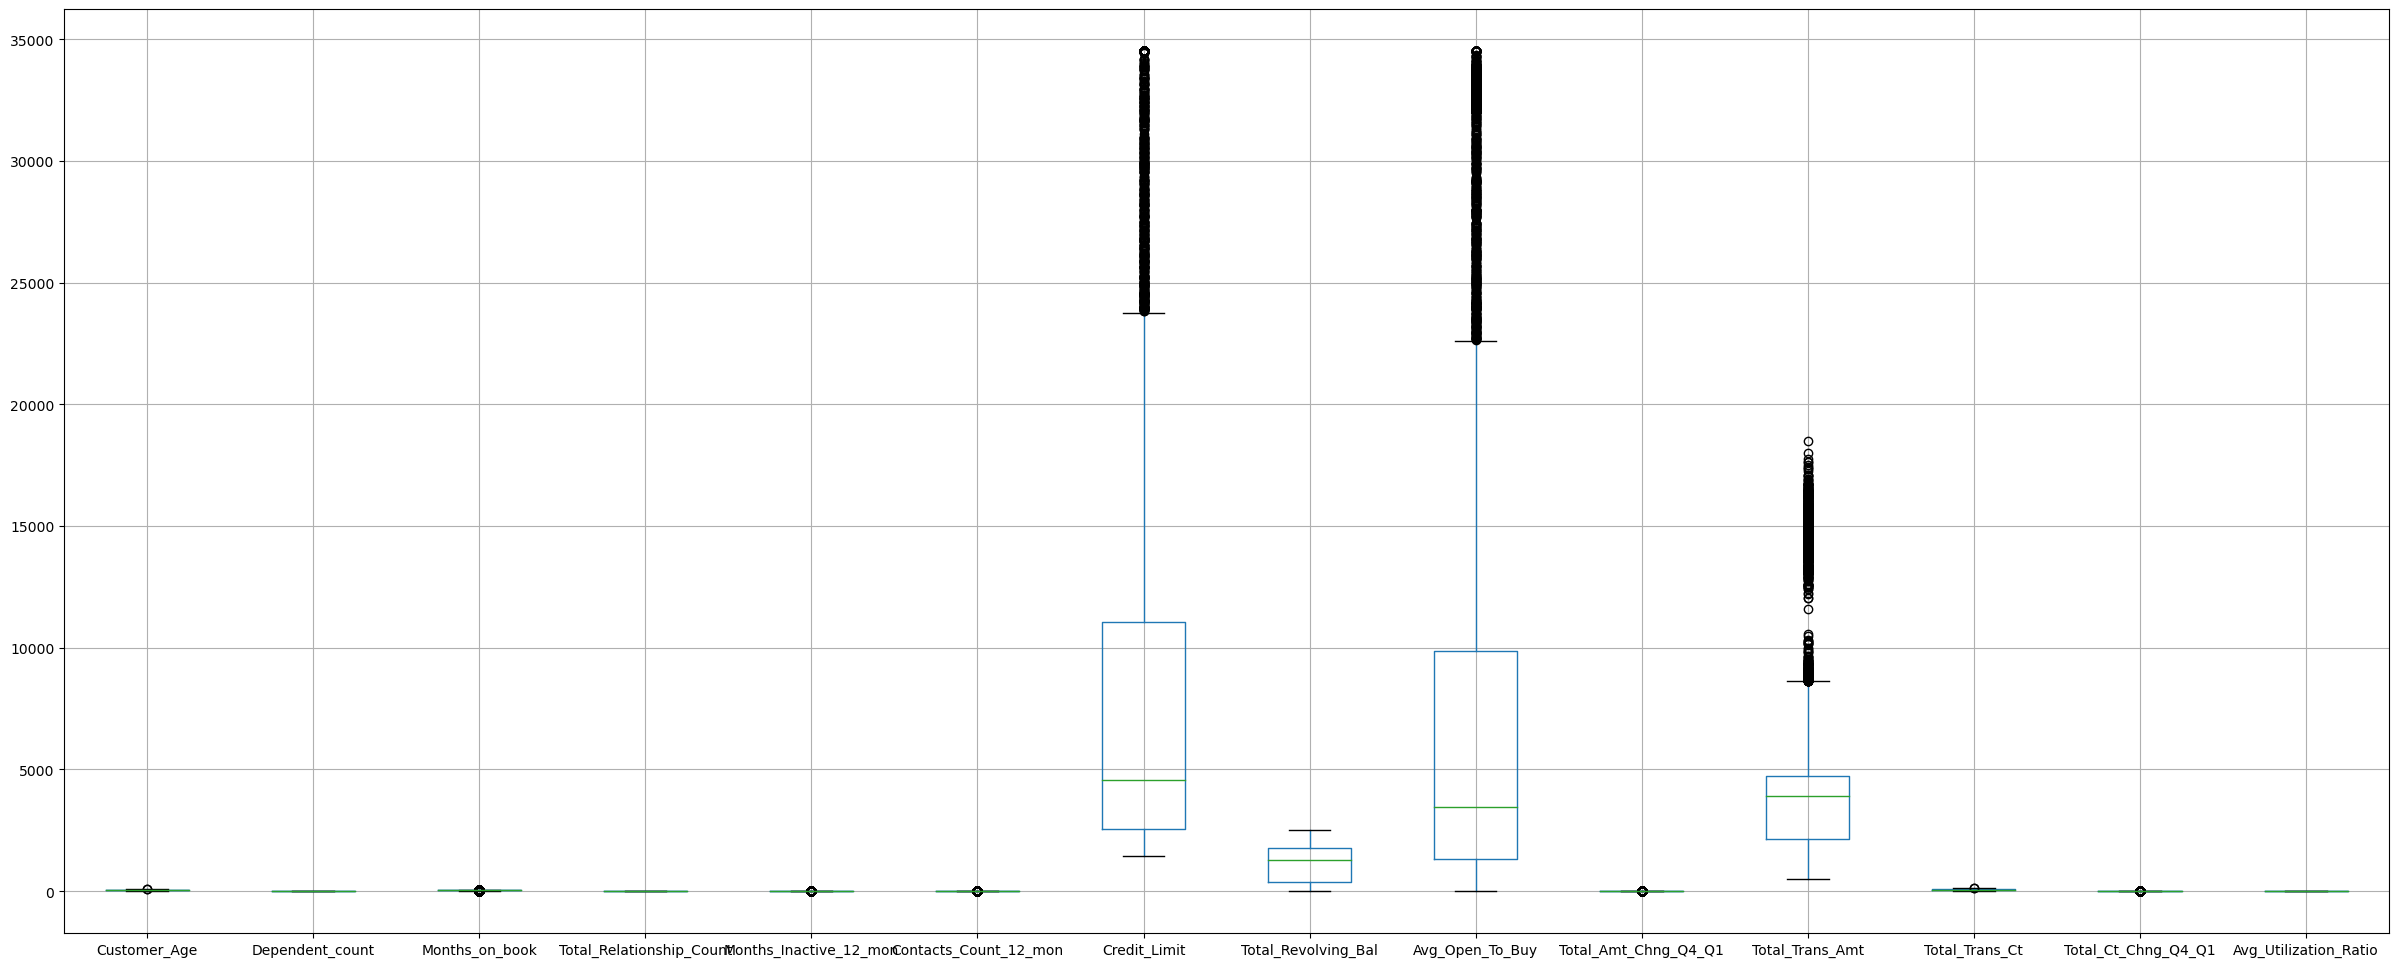

In [7]:
plt.figure(figsize = (30,12))
df_copy.boxplot()

Как видим в некоторых колонках есть существенные выбросы, которые не соответствуют нормальному распределению данных, которые нужно удалить для лучших общих данных для обучения

In [14]:
def quantiles(arr):
    work_val = arr.copy()
    Q1 = np.percentile(work_val, 25, method= 'midpoint')
    Q3 = np.percentile(work_val, 75, method= 'midpoint')
    IQR = Q3-Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    return upper,lower

def anti_emmi(df):
    if df.select_dtypes(include = [np.number]).all().any():
        for col in df.select_dtypes(include = [np.number]).columns:
            if len(df[col].unique()) != 2:
                up,low = quantiles(df[col])
                print(f'{col}: up = {up}, low = {low}')
                df[col] = df[col].drop(index = (df.loc[(df[col] < low) | (df[col] > up),col]).index) 

    return df.dropna().reset_index(drop=True)

In [15]:
df_copy = anti_emmi(df_copy)
df_copy = df_copy.dropna()
df_copy

Customer_Age: up = 68.5, low = 24.5
Dependent_count: up = 6.0, low = -2.0
Months_on_book: up = 53.5, low = 17.5
Total_Relationship_Count: up = 8.0, low = 0.0
Months_Inactive_12_mon: up = 4.5, low = 0.5
Contacts_Count_12_mon: up = 4.5, low = 0.5
Credit_Limit: up = 23075.5, low = -9848.5
Total_Revolving_Bal: up = 3758.0, low = -1514.0
Avg_Open_To_Buy: up = 21855.5, low = -11116.5
Total_Amt_Chng_Q4_Q1: up = 1.2015, low = 0.28550000000000003
Total_Trans_Amt: up = 8716.5, low = -1887.5
Total_Trans_Ct: up = 134.0, low = -10.0
Total_Ct_Chng_Q4_Q1: up = 1.1704999999999999, low = 0.23049999999999998
Avg_Utilization_Ratio: up = 1.2485, low = -0.7075


,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,57.0,F,2,Graduate,Married,Less than $40K,Blue,48.0,5,2.0,2.0,2436.0,680,1756.0,1.190,1570.0,29,0.611,0.279
1,Attrited Customer,62.0,F,0,Graduate,Married,Less than $40K,Blue,49.0,2,3.0,3.0,1438.3,0,1438.3,1.047,692.0,16,0.600,0.000
2,Existing Customer,41.0,F,3,Graduate,Single,Less than $40K,Blue,28.0,6,1.0,2.0,7768.0,1669,6099.0,0.797,1051.0,22,0.833,0.215
3,Existing Customer,58.0,M,0,Graduate,Married,$80K - $120K,Blue,49.0,6,2.0,2.0,12555.0,1696,10859.0,0.519,1291.0,24,0.714,0.135
4,Existing Customer,55.0,F,1,College,Single,Less than $40K,Blue,36.0,4,2.0,1.0,3520.0,1914,1606.0,0.510,1407.0,43,0.483,0.544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,Attrited Customer,33.0,M,4,College,Single,$40K - $60K,Silver,20.0,2,1.0,3.0,15977.0,0,15977.0,0.702,7745.0,64,0.684,0.000
4728,Attrited Customer,46.0,M,3,Graduate,Married,$60K - $80K,Blue,34.0,1,2.0,4.0,4930.0,159,4771.0,0.592,7412.0,60,0.579,0.032
4729,Attrited Customer,48.0,M,4,College,Married,$80K - $120K,Blue,44.0,2,3.0,3.0,9524.0,1449,8075.0,0.559,7527.0,58,0.657,0.152
4730,Attrited Customer,31.0,M,1,Post-Graduate,Single,$40K - $60K,Blue,24.0,4,2.0,4.0,4169.0,534,3635.0,0.836,8565.0,70,0.795,0.128


<Axes: >

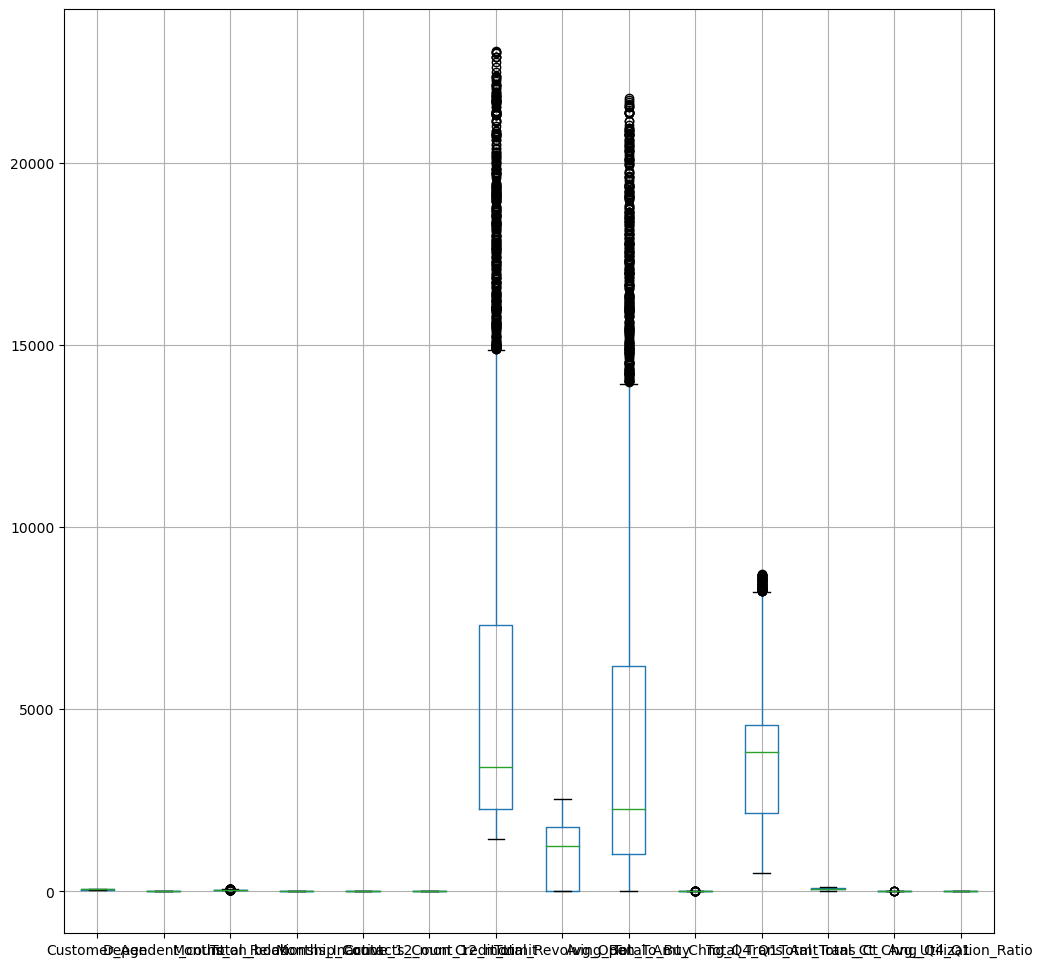

In [16]:
plt.figure(figsize = (12,12))
df_copy.boxplot()

In [17]:
#20 колоночек
#spis = ['Ушедший/Текущий','Возраст','Пол','Число иждивенцев','Образование клиента','Семейное положение','Годовой доход','Тип карты','Период пользования банком',
#        'Кол-во продуктов банка у клиента','Месяцы бездействия за 12 мес','Кол-во контактов за 12 мес','Кредитный лимит по карте',
#        'Оборотный остаток на карте','Открытая для покупки кредитная линия','Изменение суммы сделки 4 квартал сравнение 1 квартал','Общая сумма сделки за 12 мес',
#        'Общее кол-во транзакций','Изменение кол-во транзакций Q1 по Q4','Средний коэффициент использования карт']
#for i in range(0,len(df_copy.columns)):
    


### КОДИРОВКА

In [18]:
def encode(ini_df): #Напишем программу для кодировки строковых данных
    results = ini_df.copy()
    encoders = {}
    for column in results.columns:
        if results.dtypes[column] == object:
            encoders[column] = preprocessing.LabelEncoder()
            results[column] = encoders[column].fit_transform(results[column])
    return results,encoders

In [19]:
encoded_data,encoders=encode(df_copy)
encoded_data

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,57.0,0,2,2,1,4,0,48.0,5,2.0,2.0,2436.0,680,1756.0,1.190,1570.0,29,0.611,0.279
1,0,62.0,0,0,2,1,4,0,49.0,2,3.0,3.0,1438.3,0,1438.3,1.047,692.0,16,0.600,0.000
2,1,41.0,0,3,2,2,4,0,28.0,6,1.0,2.0,7768.0,1669,6099.0,0.797,1051.0,22,0.833,0.215
3,1,58.0,1,0,2,1,3,0,49.0,6,2.0,2.0,12555.0,1696,10859.0,0.519,1291.0,24,0.714,0.135
4,1,55.0,0,1,0,2,4,0,36.0,4,2.0,1.0,3520.0,1914,1606.0,0.510,1407.0,43,0.483,0.544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,0,33.0,1,4,0,2,1,3,20.0,2,1.0,3.0,15977.0,0,15977.0,0.702,7745.0,64,0.684,0.000
4728,0,46.0,1,3,2,1,2,0,34.0,1,2.0,4.0,4930.0,159,4771.0,0.592,7412.0,60,0.579,0.032
4729,0,48.0,1,4,0,1,3,0,44.0,2,3.0,3.0,9524.0,1449,8075.0,0.559,7527.0,58,0.657,0.152
4730,0,31.0,1,1,4,2,1,0,24.0,4,2.0,4.0,4169.0,534,3635.0,0.836,8565.0,70,0.795,0.128


Создадим функцию для определения каким уникальным значением была закодирована та или иная колонка

In [20]:
def encod_classes(df,encod):
    for column in df.columns:
        if df.dtypes[column] == object:
            print(df[column].unique())
            print(encoders[column].transform(df[column].unique()))
encod_classes(df_copy,encoders)

['Existing Customer' 'Attrited Customer']
[1 0]
['F' 'M']
[0 1]
['Graduate' 'College' 'High School' 'Uneducated' 'Doctorate'
 'Post-Graduate']
[2 0 3 5 1 4]
['Married' 'Single' 'Divorced']
[1 2 0]
['Less than $40K' '$80K - $120K' '$120K +' '$60K - $80K' '$40K - $60K']
[4 3 0 2 1]
['Blue' 'Silver' 'Gold' 'Platinum']
[0 3 1 2]


In [21]:
encoders

{'churn': LabelEncoder(),
 'Gender': LabelEncoder(),
 'Education_Level': LabelEncoder(),
 'Marital_Status': LabelEncoder(),
 'Income_Category': LabelEncoder(),
 'Card_Category': LabelEncoder()}

### Выводим таблицу корреляций для исследования данных на всеразличные связи

<Axes: >

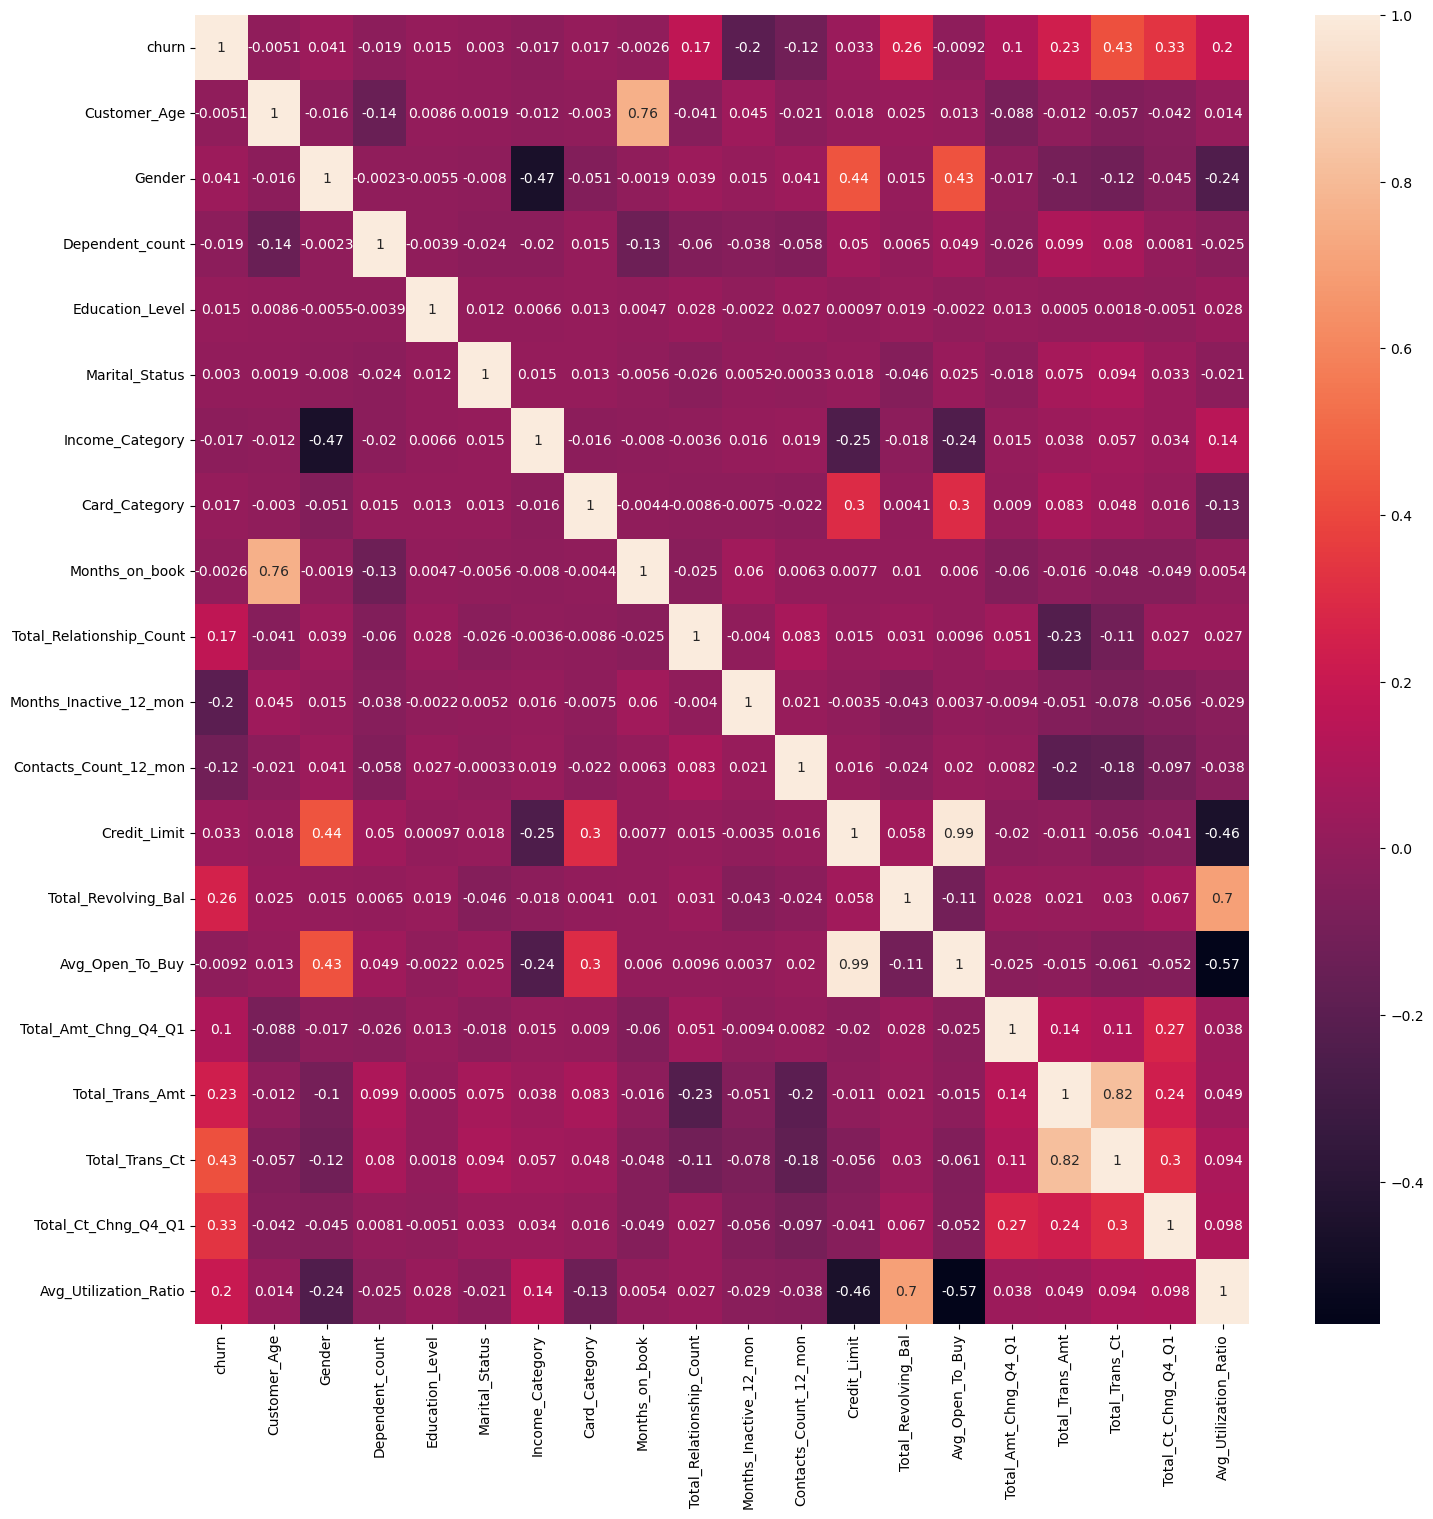

In [22]:
plt.figure(figsize=(17,17))
sns.heatmap(encoded_data.corr(),annot=True)

Как видим у нас огромное количество данных которое надо исследовать

Для начала рассмотрим колонку Avg_Utilization_Ratio с другими колонками

Колонки Credit_Limit, Total_Revolving_Bal и Avg_Open_To_Buy высоко коррелируют с исследуемой колонкой. Но как видим при удаление этих трёх колонок мы потеряем корреляцию с целевой в 0.26 в отличие от исследуемой в 0.2

Поэтому мы можем удалить колонку Avg_Util.. для предотвращение мультиколлинеарности наших данных

encoded_data.drop(columns='Avg_Utilization_Ratio',inplace=True)
plt.figure(figsize=(17,17))
sns.heatmap(encoded_data.corr(),annot=True)

Также по такой же ситуации с мультиколлинеарностью удаляем колонки Avg_Open_To_Buy, Total_Trans_Amt и Month_on_book

encoded_data.drop(columns=['Avg_Open_To_Buy','Total_Trans_Amt','Months_on_book'],inplace=True)
plt.figure(figsize=(17,17))
sns.heatmap(encoded_data.corr(),annot=True)

Также разбирая обратный случай удалим колонки, которые плохо коррелируют с другими такие как Customer_Age, Dependent_count, Education_Level, Marital_Status

encoded_data.drop(columns=['Customer_Age','Dependent_count','Education_Level','Marital_Status'],inplace=True)
plt.figure(figsize=(17,17))
sns.heatmap(encoded_data.corr(),annot=True)

Рассмотрим все переменные на графиках

In [23]:
sns.pairplot(encoded_data, vars=encoded_data.columns[:-1])
plt.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x00000288DB087490> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x00000288DB3E67A0> (for post_execute):



KeyboardInterrupt



Как видим на графике разброс наших данных велик, один из значимых выводов, которые мы можем вынесте - дисбаланс по целевой переменной

array([[<Axes: title={'center': 'churn'}>,
        <Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Dependent_count'}>],
       [<Axes: title={'center': 'Education_Level'}>,
        <Axes: title={'center': 'Marital_Status'}>,
        <Axes: title={'center': 'Income_Category'}>,
        <Axes: title={'center': 'Card_Category'}>],
       [<Axes: title={'center': 'Months_on_book'}>,
        <Axes: title={'center': 'Total_Relationship_Count'}>,
        <Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>],
       [<Axes: title={'center': 'Credit_Limit'}>,
        <Axes: title={'center': 'Total_Revolving_Bal'}>,
        <Axes: title={'center': 'Avg_Open_To_Buy'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>],
       [<Axes: title={'center': 'Total_Trans_Amt'}>,
        <Axes: title={'center': 'Total_Trans_Ct'}>,
        <Axes: title={'center': 'Total_Ct

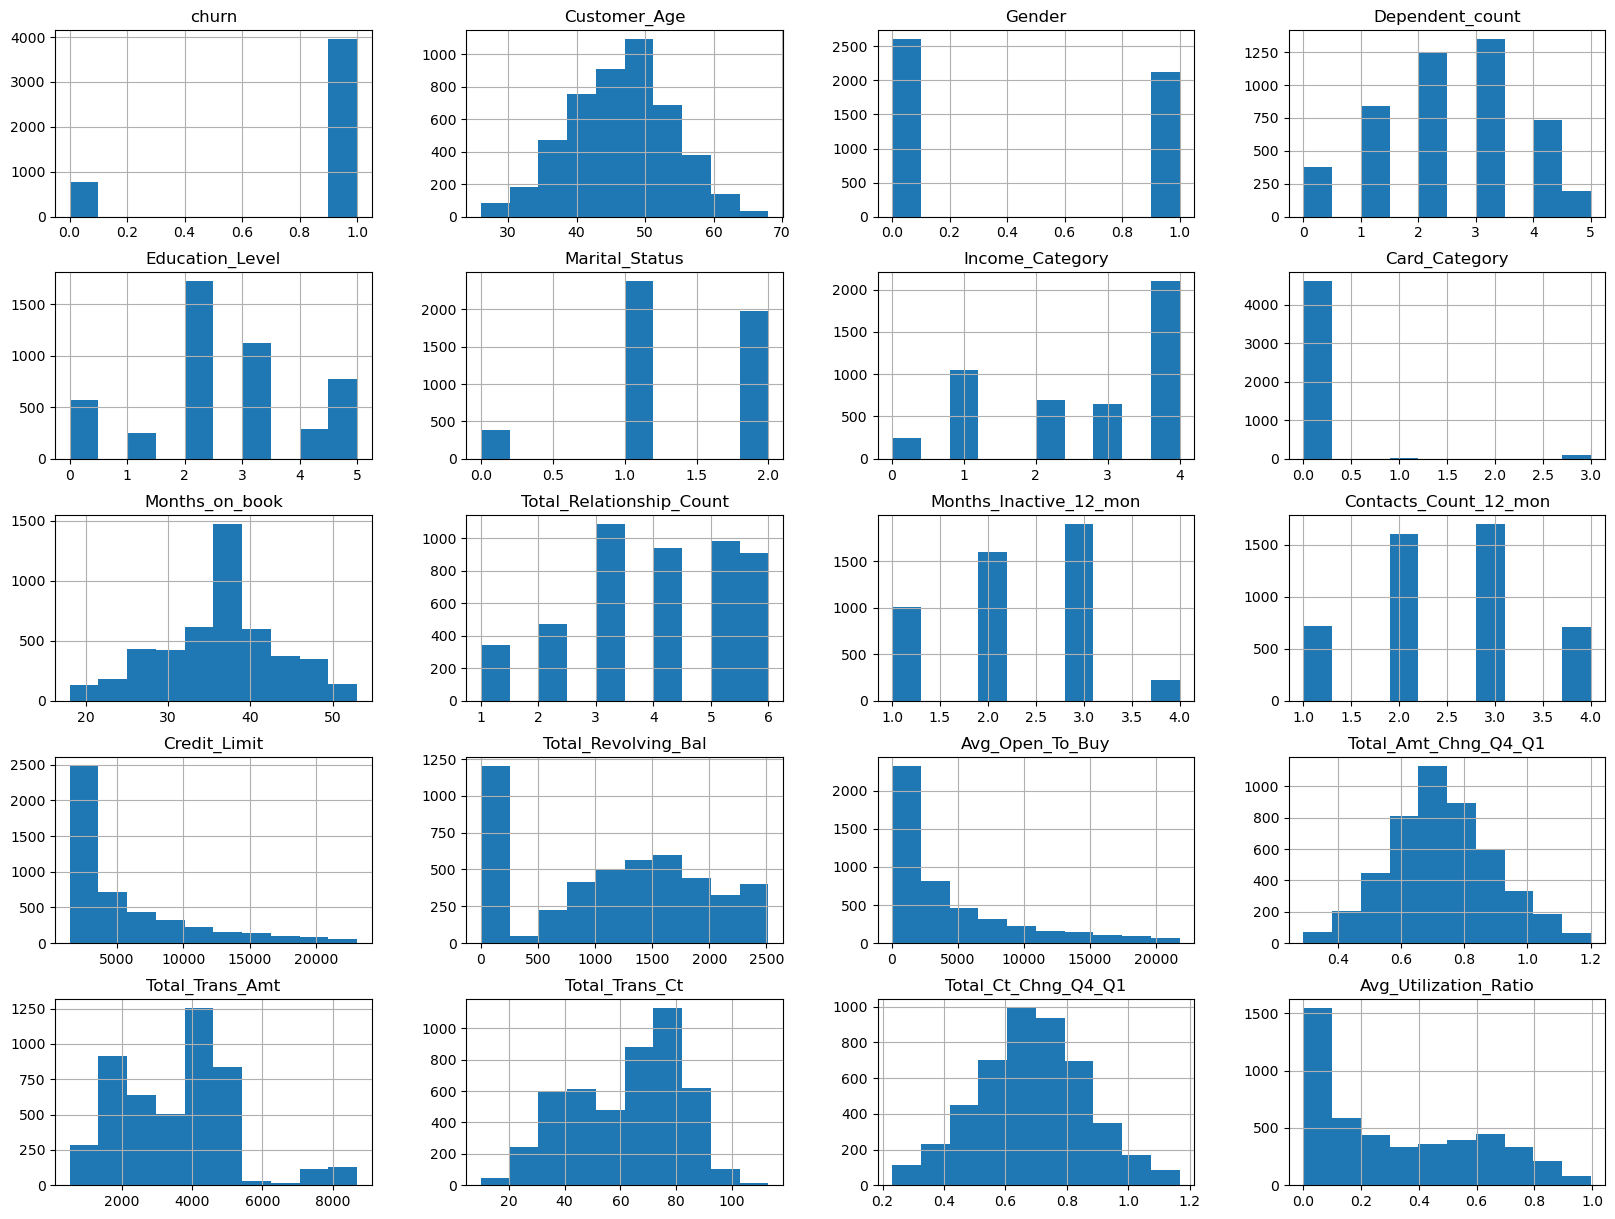

In [24]:
encoded_data.hist(figsize=(20,15))

Рассмотрим целевую переменную на графике

In [ ]:
df_copy

<Axes: >

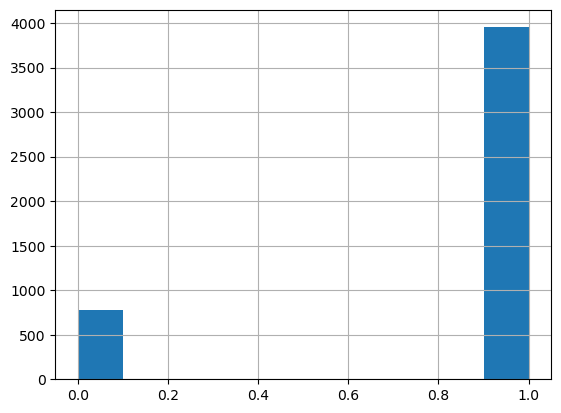

In [25]:
encoded_data['churn'].hist() #Дисбаланс по целевой переменной

s_list = ["Total_Relationship_Count",'Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
         'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']#Список не бинарных колонок которые мы будем стандартизировать

In [26]:
X = encoded_data.drop(columns = 'churn')
y = encoded_data['churn']

In [27]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,57.0,0,2,2,1,4,0,48.0,5,2.0,2.0,2436.0,680,1756.0,1.190,1570.0,29,0.611,0.279
1,62.0,0,0,2,1,4,0,49.0,2,3.0,3.0,1438.3,0,1438.3,1.047,692.0,16,0.600,0.000
2,41.0,0,3,2,2,4,0,28.0,6,1.0,2.0,7768.0,1669,6099.0,0.797,1051.0,22,0.833,0.215
3,58.0,1,0,2,1,3,0,49.0,6,2.0,2.0,12555.0,1696,10859.0,0.519,1291.0,24,0.714,0.135
4,55.0,0,1,0,2,4,0,36.0,4,2.0,1.0,3520.0,1914,1606.0,0.510,1407.0,43,0.483,0.544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,33.0,1,4,0,2,1,3,20.0,2,1.0,3.0,15977.0,0,15977.0,0.702,7745.0,64,0.684,0.000
4728,46.0,1,3,2,1,2,0,34.0,1,2.0,4.0,4930.0,159,4771.0,0.592,7412.0,60,0.579,0.032
4729,48.0,1,4,0,1,3,0,44.0,2,3.0,3.0,9524.0,1449,8075.0,0.559,7527.0,58,0.657,0.152
4730,31.0,1,1,4,2,1,0,24.0,4,2.0,4.0,4169.0,534,3635.0,0.836,8565.0,70,0.795,0.128


In [28]:
y

0       1
1       0
2       1
3       1
4       1
       ..
4727    0
4728    0
4729    0
4730    0
4731    0
Name: churn, Length: 4732, dtype: int32

In [29]:
X.shape #Выборка

(4732, 19)

In [30]:
y.shape #Основная переменная

(4732,)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)#Разбиваем всё на данные

In [33]:
X_train

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1476,48.0,1,3,1,1,3,0,41.0,3,3.0,4.0,8739.0,0,8739.0,0.715,4276.0,69,0.769,0.000
2858,35.0,0,2,1,2,4,0,30.0,5,1.0,1.0,1438.3,0,1438.3,1.126,4006.0,72,0.946,0.000
2607,39.0,0,1,5,2,4,0,34.0,3,1.0,4.0,6904.0,1148,5756.0,0.649,3485.0,84,0.615,0.166
102,52.0,1,2,2,2,0,0,37.0,2,3.0,2.0,14543.0,0,14543.0,0.788,1536.0,37,0.423,0.000
2287,38.0,0,2,2,2,1,0,36.0,6,2.0,3.0,2331.0,1709,622.0,0.851,4417.0,69,0.816,0.733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,47.0,1,3,5,0,2,0,41.0,2,3.0,3.0,1943.0,0,1943.0,0.494,5108.0,81,0.884,0.000
466,62.0,0,1,3,1,1,0,53.0,2,1.0,1.0,5249.0,0,5249.0,0.758,1315.0,31,0.722,0.000
3092,45.0,0,5,2,1,4,0,36.0,4,1.0,2.0,2289.0,1037,1252.0,0.504,4483.0,72,0.500,0.453
3772,46.0,0,2,0,0,4,0,36.0,4,3.0,1.0,1438.3,0,1438.3,0.906,4311.0,77,0.833,0.000


In [34]:
from imblearn.over_sampling import SMOTE
X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
predictions = model.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62       270
           1       0.91      0.95      0.93      1292

    accuracy                           0.88      1562
   macro avg       0.81      0.75      0.78      1562
weighted avg       0.88      0.88      0.88      1562



In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': [3, 5, 7, 9, 11] # usually odd numbers
}
clf = GridSearchCV(estimator=KNeighborsClassifier(algorithm='brute'),           
                  param_grid=params, 
                  cv=5,
                  return_train_score=True) # Turn on cv train scores
clf.fit(X_train, y_train)